In [7]:
from matplotlib import pyplot as plt
import pandas as pd
import random
import os
import glob
from annotator_amide_trans import annotator
from pybaselines.polynomial import imodpoly
%matplotlib widget

In [8]:
wave_no = pd.read_csv('../mdi_optimization/cleaned_csvs/wave_no.csv')
kgy0_sn72 = pd.read_csv('spectral_files/0kGy_sn72.csv')
kgy2_5_sn72 = pd.read_csv('spectral_files/2.5kGy_sn72.csv')
kgy5_sn72 = pd.read_csv('spectral_files/5kGy_sn72.csv') 
kgy10_sn72 = pd.read_csv('spectral_files/10kGy_sn72.csv') 
kgy25_sn72 = pd.read_csv('spectral_files/25kGy_sn72.csv')
kgy50_sn72 = pd.read_csv('spectral_files/50kGy_sn72.csv')


for df in [kgy0_sn72, kgy2_5_sn72, kgy5_sn72, kgy10_sn72, kgy25_sn72, kgy50_sn72]:
    df['average'] = df.iloc[:,:].mean(axis=1)

# colors = ['blue', '#fcbba1', '#fc9272', '#fb6a4a', '#ef3b2c', '#cb181d'] #sequential (red)
# colors = ['black','blue','green', 'red'] #sequential (red) cut!
colors = ['black', '#e41a1c', '#377eb8', 'maroon', '#984ea3', '#ff7f00'] #qualitative

dose_names = ['0 kGy', '2.5 kGy', '5 kGy', '10 kGy', '25 kGy', '50 kGy']
#dose_names = ['0 kGy','5 kGy', '10 kGy', '50 kGy']

def trans(abs):
    data = ((10 ** -abs) * 100)
    return data

In [9]:
kgy0_sn72

,0kGy_sn72_rep1,0kGy_sn72_rep2,0kGy_sn72_rep3,0kGy_sn72_rep4,0kGy_sn72_rep5,0kGy_sn72_rep6,0kGy_sn72_rep7,0kGy_sn72_rep8,0kGy_sn72_rep9,average
0,0.00009,0.00046,0.00012,0.00008,0.00018,0.00020,0.00000,0.00051,0.00026,0.000211
1,-0.00000,0.00054,0.00017,0.00020,0.00009,0.00009,0.00006,0.00070,0.00039,0.000249
2,-0.00008,0.00054,0.00022,0.00029,0.00004,0.00001,0.00008,0.00084,0.00047,0.000268
3,-0.00011,0.00045,0.00023,0.00032,0.00003,0.00000,0.00007,0.00087,0.00045,0.000257
4,-0.00008,0.00031,0.00019,0.00029,0.00007,0.00010,0.00007,0.00079,0.00035,0.000232
...,...,...,...,...,...,...,...,...,...,...
1645,-0.00285,0.00240,0.00244,-0.00072,-0.00129,0.00329,-0.00057,0.00292,0.00108,0.000744
1646,-0.00301,0.00208,0.00198,-0.00029,-0.00209,0.00309,0.00045,0.00218,0.00270,0.000788
1647,-0.00261,0.00088,0.00147,-0.00044,-0.00210,0.00195,0.00125,0.00154,0.00254,0.000498
1648,-0.00141,0.00000,0.00074,-0.00032,-0.00116,0.00095,0.00112,0.00076,0.00134,0.000224


In [10]:
wave_no

,wave_no
0,3996.73391
1,3994.67373
2,3992.61356
3,3990.55339
4,3988.49322
...,...
1645,607.75077
1646,605.69060
1647,603.63043
1648,601.57026


<h1 style="text-align: center;">Molecular Features of Irradiated Samples</h1>

<h2>Raw Spectra</h2>

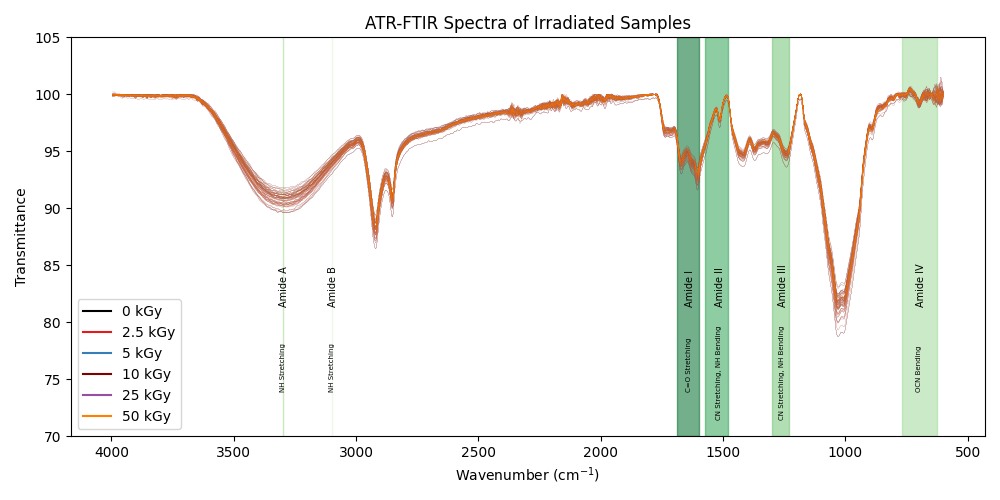

In [11]:
irrad_comp, axis = plt.subplots(1,1, figsize=(10,5))
data = [kgy0_sn72, kgy2_5_sn72, kgy5_sn72, kgy10_sn72, kgy25_sn72, kgy50_sn72]

for color, df in zip(colors, data):
    for sample in df.columns:
        axis.plot(wave_no, trans(df[sample]), color=color, linewidth=0.05)

for color, name in zip(colors, dose_names):
    axis.plot([],[], color=color, label=name)

annotator(axis)
axis.invert_xaxis()
axis.set(title='ATR-FTIR Spectra of Irradiated Samples',
         xlabel='Wavenumber (cm$^{-1}$)',
         ylabel='Transmittance')

axis.legend()
irrad_comp.tight_layout()

<h2>Averaged Spectra</h2>

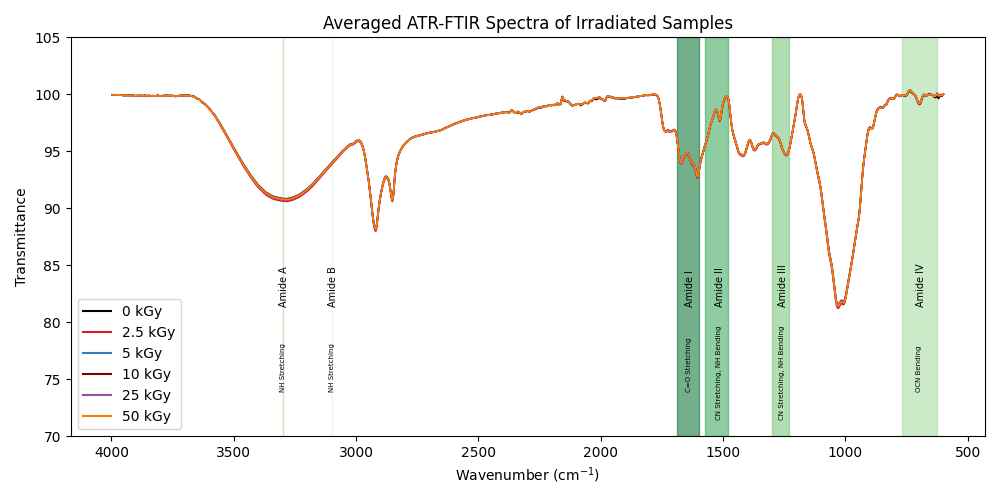

In [12]:
irrad_ave, axis = plt.subplots(1,1, figsize=(10,5))

ave = [trans(df['average']) for df in data]

for color, name, spec in zip(colors, dose_names, ave):
    axis.plot([],[], color=color, label=name)
    axis.plot(wave_no, spec, color=color, linewidth=1.2)

axis.set(title='Averaged ATR-FTIR Spectra of Irradiated Samples',
         xlabel='Wavenumber (cm$^{-1}$)',
         ylabel='Transmittance')

annotator(axis)
axis.invert_xaxis()

axis.legend()
irrad_ave.tight_layout()